### Import packages to be used for dataset cleaning

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset into python

In [2]:
churn = pd.read_csv("/Users/dhchoe/Desktop/D206/D206_PA/churn_raw_data.csv")

### Reviewing first five rows of the dataset to make sure it was imported properly

In [ ]:
churn.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


### Indentify number of rows and columns

In [4]:
churn.shape

(10000, 52)

### Review information and data types of dataset 

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

### Detect duplicated rows in dataset

In [6]:
churn.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
churn.duplicated().value_counts()

False    10000
dtype: int64

### No duplicate rows
#### But if there was execute following code

In [ ]:
#churn = churn.drop_duplicates()

### Detect missing values in dataset
#### Sum of nan/null values

In [8]:
churn.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

### Visualizing missing data

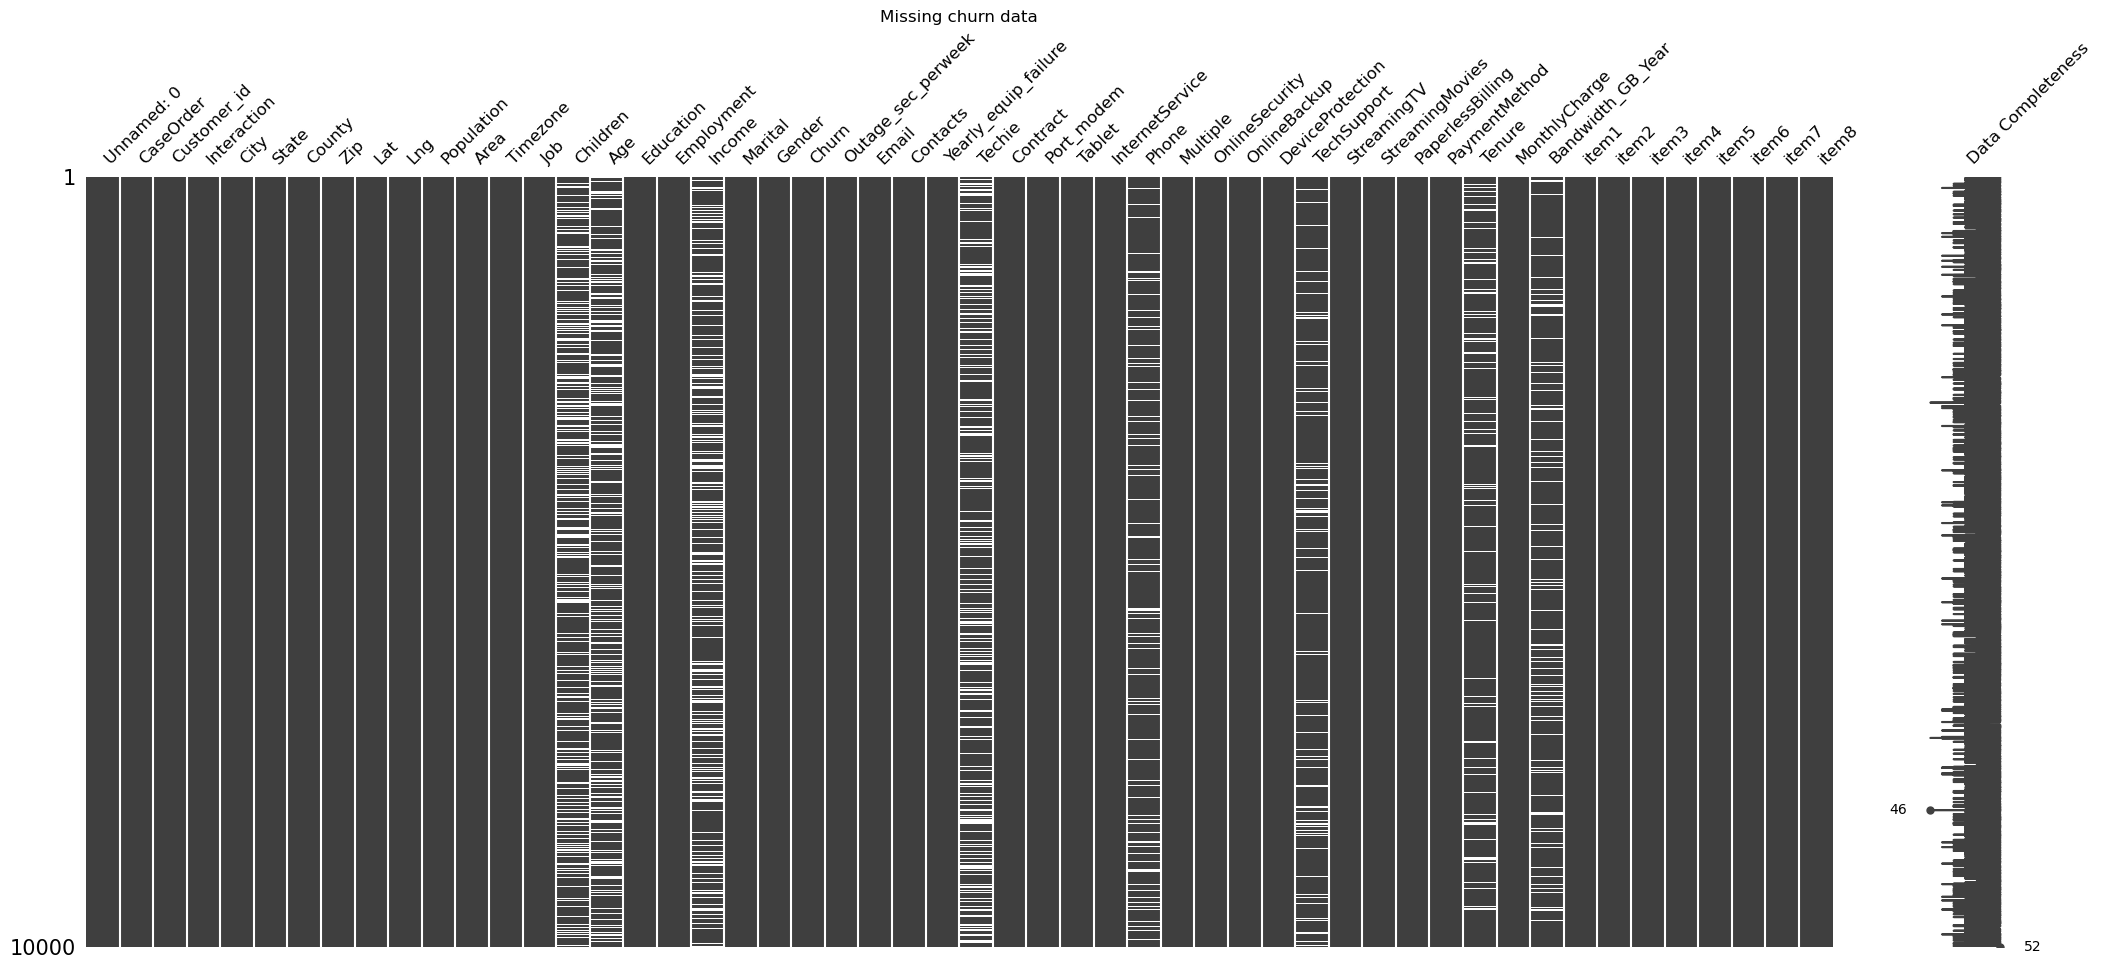

In [9]:
msno.matrix(churn, fontsize = 12, labels = True)
plt.title('Missing churn data')
plt.show()

### Treatment of children column missing data

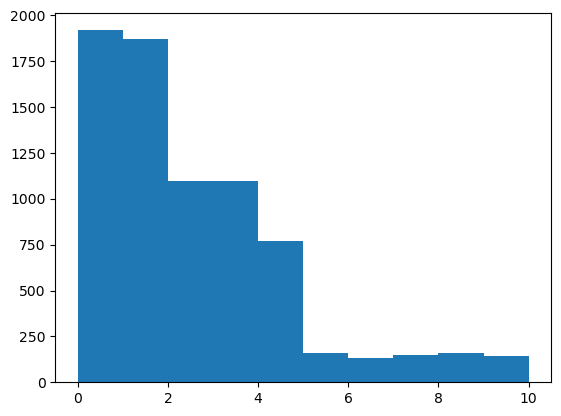

In [10]:
plt.hist(churn['Children'])
plt.show()

In [11]:
churn['Children'].fillna(churn['Children'].median(), inplace = True)

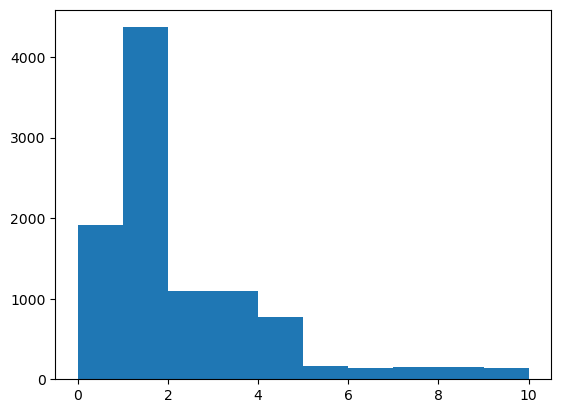

In [12]:
plt.hist(churn['Children'])
plt.show()

### Treatment of age column missing data

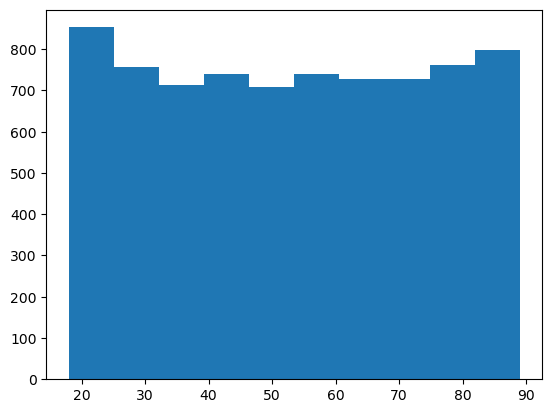

In [13]:
plt.hist(churn['Age'])
plt.show()

In [14]:
churn['Age'].fillna(churn['Age'].mean(), inplace = True)

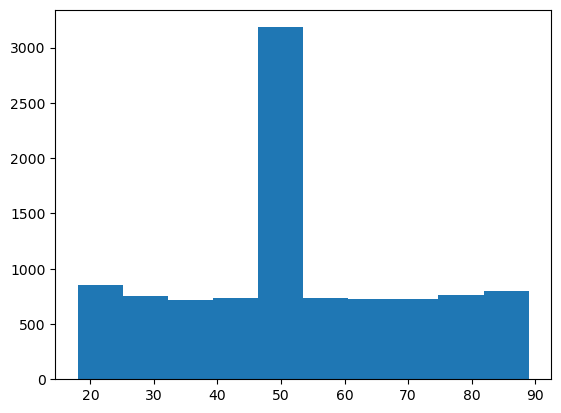

In [15]:
plt.hist(churn['Age'])
plt.show()

### Treatment of income column missing data

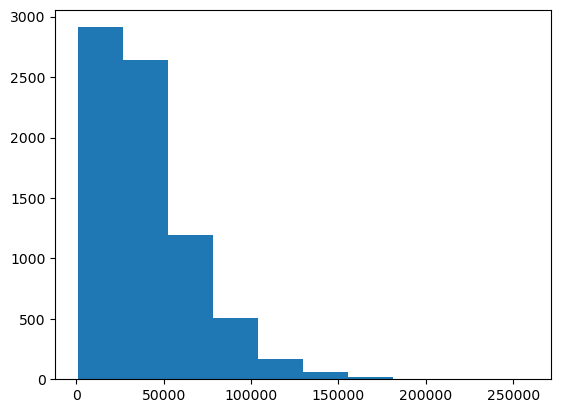

In [16]:
plt.hist(churn['Income'])
plt.show()

In [17]:
churn['Income'].fillna(churn['Income'].median(), inplace = True)

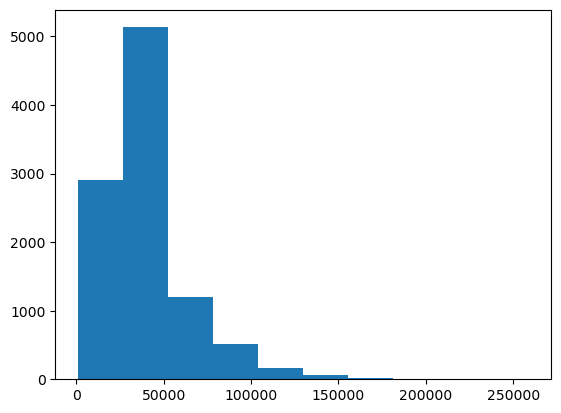

In [18]:
plt.hist(churn['Income'])
plt.show()

### Treatment of techie column missing data

In [19]:
churn['Techie'].describe()

count     7523
unique       2
top         No
freq      6266
Name: Techie, dtype: object

In [20]:
churn['Techie'] = churn['Techie'].fillna(churn['Techie'].mode()[0])

In [21]:
churn['Techie'].describe()

count     10000
unique        2
top          No
freq       8743
Name: Techie, dtype: object

### Treatment of phone column missing data

In [22]:
churn['Phone'].describe()

count     8974
unique       2
top        Yes
freq      8128
Name: Phone, dtype: object

In [23]:
churn['Phone'] = churn['Phone'].fillna(churn['Phone'].mode()[0])

In [24]:
churn['Phone'].describe()

count     10000
unique        2
top         Yes
freq       9154
Name: Phone, dtype: object

### Treatment of TechSupport column missing data

In [25]:
churn['TechSupport'].describe()

count     9009
unique       2
top         No
freq      5635
Name: TechSupport, dtype: object

In [26]:
churn['TechSupport'] = churn['TechSupport'].fillna(churn['TechSupport'].mode()[0])

In [27]:
churn['TechSupport'].describe()

count     10000
unique        2
top          No
freq       6626
Name: TechSupport, dtype: object

### Treatment of Tenure column missing data

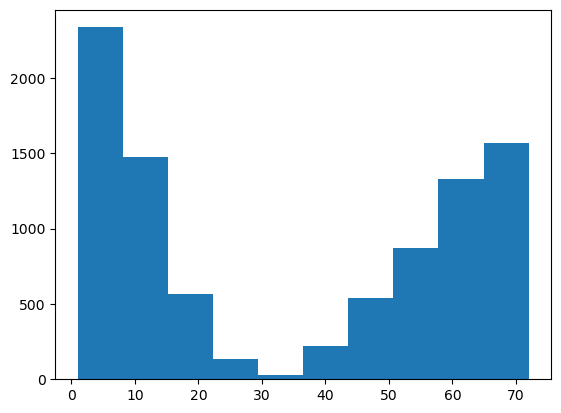

In [28]:
plt.hist(churn['Tenure'])
plt.show()

In [29]:
churn['Tenure'].fillna(churn['Tenure'].median(), inplace = True)

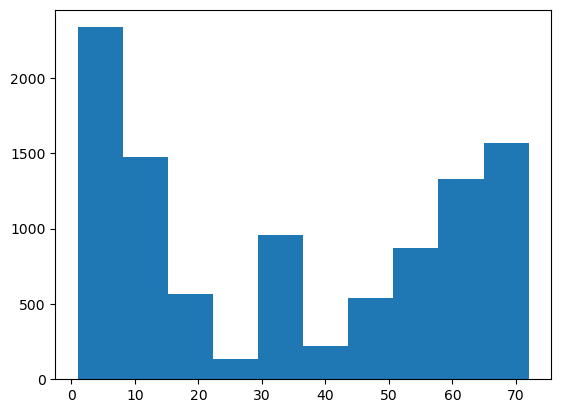

In [30]:
plt.hist(churn['Tenure'])
plt.show()

### Treatment of Bandwidth_GB_Year column misssing data

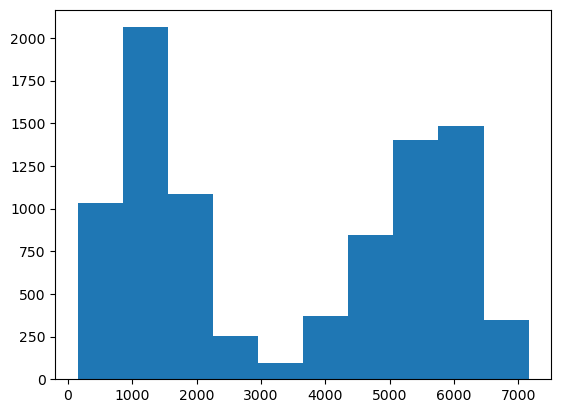

In [31]:
plt.hist(churn['Bandwidth_GB_Year'])
plt.show()

In [32]:
churn['Bandwidth_GB_Year'].fillna(churn['Bandwidth_GB_Year'].median(), inplace = True)

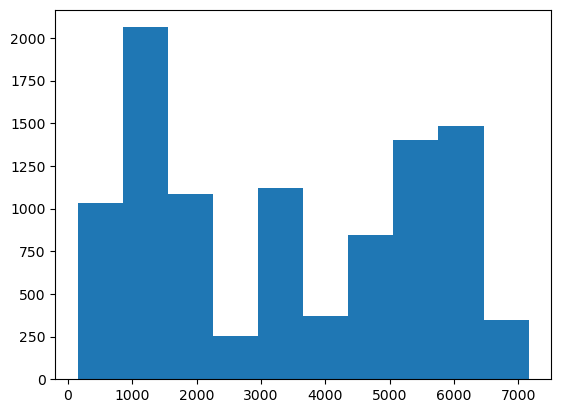

In [33]:
plt.hist(churn['Bandwidth_GB_Year'])
plt.show()

### Verifying no nan/null values

In [34]:
churn.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

### Detecting outliner in dataset

In [35]:
with pd.option_context('display.max_columns', None): #Shows all columns 
    display(churn.describe())

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,1.822500,53.275748,38256.017897,11.452955,12.016000,0.994200,0.398000,34.656864,174.076305,3397.166397,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,1.925971,18.003063,24747.872761,7.025921,3.025898,0.988466,0.635953,25.182812,43.335473,2072.718575,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,1.000000,41.000000,23660.790000,8.054362,10.000000,0.000000,0.000000,8.700329,141.071078,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.275748,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,65.000000,45504.192500,12.487644,14.000000,2.000000,1.000000,60.153487,203.777441,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


### Exploring Outage_sec_perweek column

In [36]:
only_outage = churn['Outage_sec_perweek']
(only_outage < 0).sum()

11

In [37]:
only_outage.sort_values().head(20)

4167   -1.348571
1904   -1.195428
4427   -1.099934
6093   -0.787115
6577   -0.527396
4184   -0.352431
1997   -0.339214
8194   -0.214328
3069   -0.206145
3629   -0.152845
6463   -0.144644
7339    0.113821
908     0.169351
4697    0.278712
7070    0.359073
9402    0.683623
2984    0.840953
8191    0.852520
8180    0.915846
7389    0.994552
Name: Outage_sec_perweek, dtype: float64

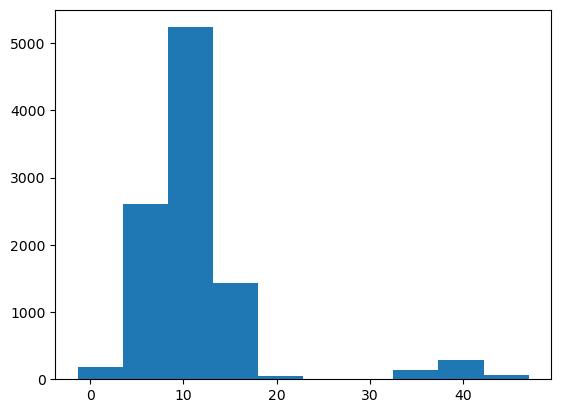

In [38]:
plt.hist(churn['Outage_sec_perweek'])
plt.show()

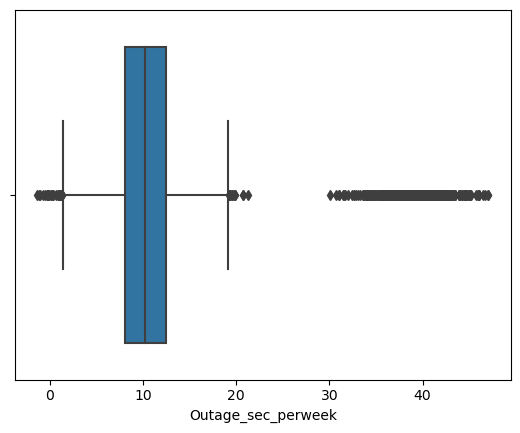

In [39]:
sns.boxplot(x = 'Outage_sec_perweek', data = churn)
plt.show()

In [40]:
(only_outage > 30).sum()

500

In [41]:
churn['Outage_sec_perweek'] = np.abs(churn['Outage_sec_perweek'])

In [42]:
churn['Outage_sec_perweek'].describe()

count    10000.000000
mean        11.454229
std          7.023844
min          0.113821
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

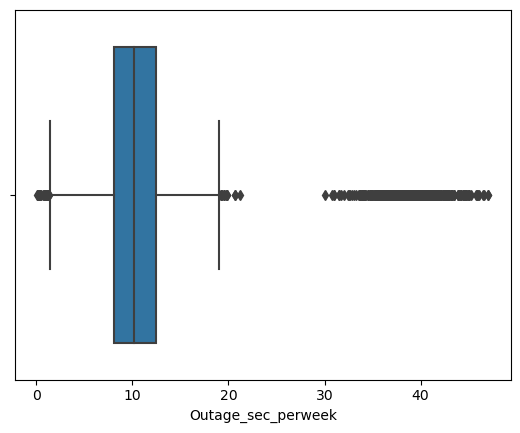

In [43]:
sns.boxplot(x = 'Outage_sec_perweek', data = churn)
plt.show()

### Churn column cat re-expression

In [ ]:
churn.Churn.unique()

In [ ]:
churn['churn_cat'] = churn['Churn']
churn['churn_cat'].head()

In [ ]:
dict_churn = {"churn_cat": {"No": 0, "Yes": 1}}

In [ ]:
churn.replace(dict_churn, inplace=True)
churn['churn_cat'].head()

### Techie column cat re-expression

In [44]:
churn.Techie.unique()

array(['No', 'Yes'], dtype=object)

In [45]:
churn['techie_cat'] = churn['Techie']
churn['techie_cat'].head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: techie_cat, dtype: object

In [46]:
dict_techie = {"techie_cat": {"No": 0, "Yes": 1}}

In [47]:
churn.replace(dict_techie, inplace=True)
churn['techie_cat'].head()

0    0
1    1
2    1
3    1
4    0
Name: techie_cat, dtype: int64

### Port_modem column re-expression

In [48]:
churn.Port_modem.unique()

array(['Yes', 'No'], dtype=object)

In [49]:
churn['modem_cat'] = churn['Port_modem']
churn['modem_cat'].head()

0    Yes
1     No
2    Yes
3     No
4    Yes
Name: modem_cat, dtype: object

In [50]:
dict_modem = {"modem_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_modem, inplace=True)
churn['modem_cat'].head()

0    1
1    0
2    1
3    0
4    1
Name: modem_cat, dtype: int64

### Tablet column re-expression

In [51]:
churn.Tablet.unique()

array(['Yes', 'No'], dtype=object)

In [52]:
churn['tablet_cat'] = churn['Tablet']
churn['tablet_cat'].head()

0    Yes
1    Yes
2     No
3     No
4     No
Name: tablet_cat, dtype: object

In [53]:
dict_tablet = {"tablet_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_tablet, inplace=True)
churn['tablet_cat'].head()

0    1
1    1
2    0
3    0
4    0
Name: tablet_cat, dtype: int64

### Phone column re-expression

In [54]:
churn.Phone.unique()

array(['Yes', 'No'], dtype=object)

In [55]:
churn['phone_cat'] = churn['Phone']
churn['phone_cat'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: phone_cat, dtype: object

In [56]:
dict_phone = {"phone_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_phone, inplace=True)
churn['phone_cat'].head()

0    1
1    1
2    1
3    1
4    0
Name: phone_cat, dtype: int64

### Multiple column cat re-expression

In [57]:
churn.Multiple.unique()

array(['No', 'Yes'], dtype=object)

In [58]:
churn['multi_cat'] = churn['Multiple']
churn['multi_cat'].head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: multi_cat, dtype: object

In [59]:
dict_multi = {"multi_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_multi, inplace=True)
churn['multi_cat'].head()

0    0
1    1
2    1
3    0
4    0
Name: multi_cat, dtype: int64

### OnlineSecurity column cat re-expression

In [60]:
churn.OnlineSecurity.unique()

array(['Yes', 'No'], dtype=object)

In [61]:
churn['sec_cat'] = churn['OnlineSecurity']
churn['sec_cat'].head()

0    Yes
1    Yes
2     No
3    Yes
4     No
Name: sec_cat, dtype: object

In [62]:
dict_sec = {"sec_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_sec, inplace=True)
churn['sec_cat'].head()

0    1
1    1
2    0
3    1
4    0
Name: sec_cat, dtype: int64

### OnlineBackup column cat re-expression

In [63]:
churn.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

In [64]:
churn['backup_cat'] = churn['OnlineBackup']
churn['backup_cat'].head()

0    Yes
1     No
2     No
3     No
4     No
Name: backup_cat, dtype: object

In [65]:
dict_backup = {"backup_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_backup, inplace=True)
churn['backup_cat'].head()

0    1
1    0
2    0
3    0
4    0
Name: backup_cat, dtype: int64

### DeviceProtection column cat re-expression

In [66]:
churn.DeviceProtection.unique()

array(['No', 'Yes'], dtype=object)

In [67]:
churn['prot_cat'] = churn['DeviceProtection']
churn['prot_cat'].head()

0    No
1    No
2    No
3    No
4    No
Name: prot_cat, dtype: object

In [68]:
dict_prot = {"prot_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_prot, inplace=True)
churn['prot_cat'].head()

0    0
1    0
2    0
3    0
4    0
Name: prot_cat, dtype: int64

### TechSupport column cat re-expression

In [69]:
churn.TechSupport.unique()

array(['No', 'Yes'], dtype=object)

In [70]:
churn['sup_cat'] = churn['TechSupport']
churn['sup_cat'].head()

0     No
1     No
2     No
3     No
4    Yes
Name: sup_cat, dtype: object

In [71]:
dict_sup = {"sup_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_sup, inplace=True)
churn['sup_cat'].head()

0    0
1    0
2    0
3    0
4    1
Name: sup_cat, dtype: int64

### StreamingTV column cat re-expression

In [72]:
churn.StreamingTV.unique()

array(['No', 'Yes'], dtype=object)

In [73]:
churn['streamTV_cat'] = churn['StreamingTV']
churn['streamTV_cat'].head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: streamTV_cat, dtype: object

In [74]:
dict_streamTV = {"streamTV_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_streamTV, inplace=True)
churn['streamTV_cat'].head()

0    0
1    1
2    0
3    1
4    1
Name: streamTV_cat, dtype: int64

### StreamingMovies column cat re-expression

In [75]:
churn.StreamingMovies.unique()

array(['Yes', 'No'], dtype=object)

In [76]:
churn['streamMOV_cat'] = churn['StreamingMovies']
churn['streamMOV_cat'].head()

0    Yes
1    Yes
2    Yes
3     No
4     No
Name: streamMOV_cat, dtype: object

In [77]:
dict_streamMOV = {"streamMOV_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_streamMOV, inplace=True)
churn['streamMOV_cat'].head()

0    1
1    1
2    1
3    0
4    0
Name: streamMOV_cat, dtype: int64

### PaperlessBilling column cat re-expression

In [78]:
churn.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [79]:
churn['PaperlessBilling_cat'] = churn['PaperlessBilling']
churn['PaperlessBilling_cat'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: PaperlessBilling_cat, dtype: object

In [80]:
dict_PaperlessBilling = {"PaperlessBilling_cat": {"No": 0, "Yes": 1}}
churn.replace(dict_PaperlessBilling, inplace=True)
churn['PaperlessBilling_cat'].head()

0    1
1    1
2    1
3    1
4    0
Name: PaperlessBilling_cat, dtype: int64

In [81]:
with pd.option_context('display.max_columns', None):
    display(churn.head())

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,techie_cat,modem_cat,tablet_cat,phone_cat,multi_cat,sec_cat,backup_cat,prot_cat,sup_cat,streamTV_cat,streamMOV_cat,PaperlessBilling_cat
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,1.0,68.0,Master's Degree,Part Time,28561.990,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,0,1,1,1,0,1,1,0,0,0,1,1
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.770,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,1,0,1,1,1,1,0,0,0,1,1,1
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,33186.785,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3,1,1,0,1,1,0,0,0,0,0,1,1
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.230,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3,1,0,0,1,0,1,0,0,0,1,0,1
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.190,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5,0,1,0,0,0,0,0,0,1,1,0,0


### PCA 

In [82]:
from sklearn.decomposition import PCA #importing PCA package

In [83]:
churn_pca = churn[['Children', 'Age', 'Income', 'Bandwidth_GB_Year']]

### Normalizing data to apply PCA

In [84]:
churn_pca_normalized = (churn_pca-churn_pca.mean())/churn_pca.std()

In [85]:
pca = PCA(n_components = churn_pca.shape[1])

In [86]:
pca.fit(churn_pca_normalized)

PCA(n_components=4)

In [87]:
churn_pca2 = pd.DataFrame(pca.transform(churn_pca_normalized), columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [88]:
loadings = pd.DataFrame(pca.components_.T, 
                        columns = ['PC1', 'PC2', 'PC3', 'PC4'],
                        index = churn_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4
Children,0.549228,0.311000,0.599327,0.492377
Age,-0.600028,0.326936,-0.197298,0.702960
Income,0.236633,0.831983,-0.403571,-0.298229
Bandwidth_GB_Year,0.531338,-0.322795,-0.662579,0.417698


### Selecting PCs

In [89]:
cov_matrix = np.dot(churn_pca_normalized.T, churn_pca_normalized) / churn_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

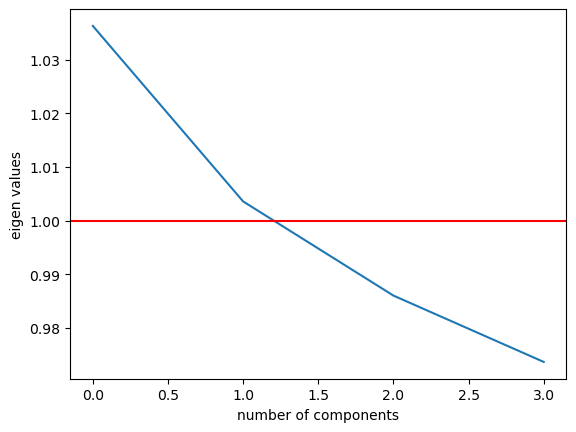

In [90]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigen values')
plt.axhline(y = 1, color = "red")
plt.show()